# Research Question

How does the stock price performance of post-IPO technology companies in areas such as Data, Retail, Security, Hardware, Transportation, AI, and Crypto from 2020 to 2023 in the United States correlate with the layoff decisions made by these companies?


## Background and Prior Work

The stock performance of technology companies is intricately linked to a variety of factors, encompassing market dynamics, financial management, and corporate decision-making. An in-depth comprehension of how stock prices correlate with the hiring and layoff decisions made by these firms is crucial for analyzing the dynamic landscape of the tech industry in San Francisco from 2020 to 2023.

In the sub-areas of the technology sector - Data, Retail, Security, Hardware, Transportation, AI, and Crypto - there has been a growing interest in unraveling the impact of stock prices on employment decisions. Notably, annual reports and financial disclosures from tech behemoths such as Apple, Google (Alphabet Inc.), and Facebook (Meta Platforms, Inc.) offer valuable insights into how these giants shape their employment strategies amidst the ebb and flow of stock prices. Moreover, academic studies and industry analyses from renowned institutions like the Silicon Valley Leadership Group (SVLG) have delved into the workforce dynamics and trends of the tech industry.

Previous research and data analyses have illuminated the intricate relationship between stock market performance and corporate actions. For example, the research conducted by Eshghi and Astvansh in September 2023 <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) provides significant insights into how layoff announcements impact investor sentiment. Their findings suggest that proactive management actions tend to yield a positive response from investors, while reactive measures may provoke negative reactions. Additionally, Rigby's work in April 2022 <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) challenges the conventional practice of layoffs during economic downturns, emphasizing that they may not always yield desired outcomes. Rigby underscores that strategic considerations and timing are crucial when contemplating layoffs, and their research demonstrates that firms often respond to financial challenges by reducing their workforce.

This research aims to build upon and expand the existing body of knowledge within this field, with a specific focus on technology companies in San Francisco during the selected time frame, where the pandemic may bring some impact. Through an in-depth analysis of the relationship between stock price performance and hiring/layoff decisions within this regional context, we strive to provide a more comprehensive understanding of the factors influencing employment strategies within the technology sector.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Eshghi, K., Astvansh, V. (21 Sept 2023) Stock Investors' Reaction to Layoff Announcements: A Meta-analysis. *Human Resource Management Journal*. https://onlinelibrary.wiley.com/doi/full/10.1111/1748-8583.12532 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Rigby, D. (April 2002) Look Before You Lay Off. *Harvard Business Review*. https://hbr.org/2002/04/look-before-you-lay-off 


# Hypothesis


Our main hypothesis and prediction is that there's a **negative** correlation between the stock market performance with companies' layoff decisions. We anticipate this correlation because when a company's stock performs well, it often reflects positive financial health, which might lead to increased hiring and job security. Conversely, during stock market downturns, companies might make layoffs to cut costs.

# Data

## Data overview

- Dataset #1 **Layoffs**
  - Dataset Name: Layoffs Dataset
  - Link to the dataset: https://www.kaggle.com/datasets/swaptr/layoffs-2022 
  - Number of observations: 3148 (After filtered: 195)
  - Number of variables: 9
- Dataset #2 **Stock Prices**
  - Dataset Name: Yahoo Finance Stock Market
  - Link to the dataset: https://finance.yahoo.com/lookup 
  - Number of observations: 4369
  - Number of variables: 8

The initial dataset on layoffs comprises 3148 observations and 9 variables, documenting layoffs from 2020 to 2023. A targeted analysis honed in on post-IPO companies in the United States within essential technology sectors, including `Data`, `Retail`, `Security`, `Hardware`, `Transportation`, `AI`, `Crypto`, and `Other`. The refined subset, totaling 195 observations, offers a granular exploration of layoff trends in these specific industries. Key variables, such as `company`, `location`, `industry`, and `date`, facilitate a nuanced understanding of layoffs within the designated technological domains. Cleaning and preprocessing tasks involve addressing missing data, ensuring date format consistency, and managing outliers to bolster the reliability of the analysis.

The second dataset compiles monthly stock prices from Yahoo Finance across `Data`, `Retail`, `Security`, `Hardware`, `Transportation`, `AI`, `Crypto`, and `Other` industries, spanning 2020 to 2023. With 4369 observations and 8 variables (company's `Ticker`, `Date`, `Open` price, `Highest` price, `Low` price, `Close` price, `Adj Close`, and `Volume`), the focus centers on comprehending stock price variations. Emphasis lies in correlating this dataset with the layoffs dataset using dates and company names, with a specific interest in closing prices as indicators of financial performance. 

The integration of both datasets will involve a meticulous merging process, relying on common variables like company name and date. This synergy aims to provide a holistic understanding of the relationship between layoffs and stock price dynamics within essential technology-related industries from 2020 to 2023. Aligning the refined layoff dataset, with its focus on post-IPO companies, with the monthly stock prices dataset allows for insights into potential correlations between workforce changes and financial performance.

In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from datetime import datetime


import requests

## Layoffs Dataset

In [24]:
layoffs = pd.read_csv('layoffs.csv')
layoffs.sort_values(by='date')

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
3147,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0
3146,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
3144,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
3145,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
3143,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
...,...,...,...,...,...,...,...,...,...
4,Informatica,SF Bay Area,Data,545.0,0.10,2023-11-01,Post-IPO,United States,NaN
3,Orchard,New York City,Real Estate,NaN,NaN,2023-11-02,Series D,United States,472.0
2,OpenSpace,SF Bay Area,Construction,NaN,NaN,2023-11-02,Series D,United States,200.0
1,Viasat,San Diego,Other,800.0,0.10,2023-11-02,Post-IPO,United States,366.0


In [25]:
# Filter to focus on post-IPO companies in the US in the specific industries
layoffs = layoffs[(layoffs['stage'] == 'Post-IPO') & (layoffs['country'] == 'United States') & \
                  (layoffs['industry'].isin(['Data', 'Retail', 'Security', 'Hardware', 'Transportation', \
                                             'AI', 'Crypto', 'Other']))]
layoffs.reset_index(drop=True, inplace=True)

layoffs = layoffs.copy()
layoffs['date'] = pd.to_datetime(layoffs['date'])
# Create a new column 'Month' to represent the month of each date
layoffs['month'] = layoffs['date'].dt.to_period("M")
layoffs = layoffs.drop('date', axis=1)

# Group by 'Month' and any other relevant columns, then calculate summary statistics (e.g., count of layoffs)
layoffs_grouped = layoffs.groupby(['company', 'location', 'industry', 'stage', 'country', 'month']).sum().reset_index()

layoffs_grouped

,company,location,industry,stage,country,month,total_laid_off,percentage_laid_off,funds_raised
0,AEye,SF Bay Area,Transportation,Post-IPO,United States,2023-03,46.0,0.33,314.0
1,Akamai,Boston,Security,Post-IPO,United States,2023-05,290.0,0.03,35.0
2,Allbirds,SF Bay Area,Retail,Post-IPO,United States,2022-07,23.0,0.00,202.0
3,Alteryx,Los Angeles,Data,Post-IPO,United States,2023-04,320.0,0.11,613.0
4,Amazon,Seattle,Retail,Post-IPO,United States,2022-10,150.0,0.00,108.0
...,...,...,...,...,...,...,...,...,...
187,Wish,SF Bay Area,Retail,Post-IPO,United States,2023-07,255.0,0.34,1600.0
188,Zoom,SF Bay Area,Other,Post-IPO,United States,2023-02,1300.0,0.15,276.0
189,Zscaler,SF Bay Area,Security,Post-IPO,United States,2023-03,177.0,0.03,148.0
190,Zymergen,SF Bay Area,Other,Post-IPO,United States,2021-09,120.0,0.00,974.0


## Stock Prices Dataset

In [26]:
companies = list(layoffs['company'])

# Get companies' ticker
def get_ticker(company_name):
    try: 
        yfinance = "https://query2.finance.yahoo.com/v1/finance/search"
        user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36' \
        '(KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
        params = {"q": company_name, "quotes_count": 1, "country": "United States"}

        res = requests.get(url=yfinance, params=params, headers={'User-Agent': user_agent})
        data = res.json()

        company_code = data['quotes'][0]['symbol']
        return company_code
    except Exception as e:
        print(f'Error: {company_name} may not be a public company. Skipping ...')

stock_dict = {company_name: get_ticker(company_name) for company_name in companies}
stock_dict = {company_name: symbol for company_name, symbol in stock_dict.items() if symbol is not None}

Error: Qualtrics may not be a public company. Skipping ...
Error: Lucid Motors may not be a public company. Skipping ...
Error: Boxed may not be a public company. Skipping ...
Error: Embark Trucks may not be a public company. Skipping ...
Error: National Instruments may not be a public company. Skipping ...
Error: Avaya may not be a public company. Skipping ...
Error: Qualtrics may not be a public company. Skipping ...
Error: Informatica may not be a public company. Skipping ...
Error: WalkMe may not be a public company. Skipping ...
Error: SoundHound may not be a public company. Skipping ...
Error: Stitch Fix may not be a public company. Skipping ...
Error: Micron may not be a public company. Skipping ...
Error: TuSimple may not be a public company. Skipping ...
Error: Quanergy Systems may not be a public company. Skipping ...
Error: N-able Technologies may not be a public company. Skipping ...
Error: Bakkt may not be a public company. Skipping ...
Error: Lenovo may not be a public co

In [39]:
%%capture
path = 'data/' 
stock_list = list(stock_dict.values())
start_date = '2020-01-01'
end_date = '2023-11-12'

# Save each company's stock prices
def stock_data_csv(stock_list, start_date, end_date, path):
    for ticker in stock_list:
        df = yf.download(ticker, start=start_date, end=end_date)
        df.to_csv(path + ticker + '.csv')

stock_data_csv(stock_list, start_date, end_date, path)

In [28]:
# Create an empty list to store DataFrames
dfs = []

# Loop through each stock and read its CSV file, then append it to the list
for ticker in stock_list:
    file_path = path + ticker + '.csv'
    df = pd.read_csv(file_path)
    df['Ticker'] = ticker  # Adding a column to identify the stock
    df['avg'] = (df['High'] + df['Low']) / 2
    # Assuming 'Date' is already in datetime format, if not, convert it first
    df['Date'] = pd.to_datetime(df['Date'])

    # Format the 'Date' column to display only the month
    df['month'] = df['Date'].dt.to_period("M")
    df = df.drop('Date', axis=1)

    # Group by 'Ticker' and the month of the 'Date', then select the median row for each group
    df_grouped = df.groupby(['Ticker', 'month']).median().reset_index()

    dfs.append(df_grouped)

# Concatenate the list of DataFrames
stock_prices = pd.concat(dfs, ignore_index=True)
stock_prices['company'] = stock_prices['Ticker'].map({v: k for k, v in stock_dict.items()})
stock_prices = stock_prices[['company'] + [col for col in stock_prices.columns if col != 'company']]
stock_prices = stock_prices.drop(columns=["Ticker"])
stock_prices = stock_prices.groupby(['company', 'month']).mean().reset_index()
stock_prices

,company,month,Open,High,Low,Close,Adj Close,Volume,avg
0,AEye,2020-01,4.920000,5.070000,4.780000,4.980000,4.980000,14100.0,4.910000
1,AEye,2020-02,4.880000,5.100000,4.820000,4.950000,4.950000,16600.0,4.920000
2,AEye,2020-03,3.810000,3.915000,3.525000,3.670000,3.670000,22000.0,3.727500
3,AEye,2020-04,5.050000,5.350000,4.960000,5.320000,5.320000,49000.0,5.155000
4,AEye,2020-05,7.785000,8.075000,7.365000,7.735000,7.735000,56000.0,7.757500
...,...,...,...,...,...,...,...,...,...
2135,eBay,2023-07,46.055000,47.080000,45.959999,46.455000,46.455000,5095600.0,46.550000
2136,eBay,2023-08,43.619999,44.000000,43.110001,43.590000,43.590000,4181800.0,43.654999
2137,eBay,2023-09,43.695000,44.280001,43.424999,43.699999,43.699999,4598900.0,43.845000
2138,eBay,2023-10,42.180000,42.615000,41.795000,42.180000,42.180000,4650850.0,42.187500


## Merging the Datasets

In [29]:
# Merge layoffs and stock_prices by the company and month
merged_dataset = pd.merge(layoffs_grouped, stock_prices, on=['company', 'month'])
merged_dataset

,company,location,industry,stage,country,month,total_laid_off,percentage_laid_off,funds_raised,Open,High,Low,Close,Adj Close,Volume,avg
0,AEye,SF Bay Area,Transportation,Post-IPO,United States,2023-03,46.0,0.33,314.0,5.910000,6.260000,5.650000,5.860000,5.860000,14800.0,5.870000
1,Akamai,Boston,Security,Post-IPO,United States,2023-05,290.0,0.03,35.0,85.840000,86.794998,85.250000,86.344997,86.344997,1403950.0,85.945000
2,Alteryx,Los Angeles,Data,Post-IPO,United States,2023-04,320.0,0.11,613.0,53.040001,53.900002,51.790001,52.830002,52.830002,1114700.0,52.859999
3,Amazon,Seattle,Retail,Post-IPO,United States,2022-10,150.0,0.00,108.0,114.709999,116.910004,113.220001,115.070000,115.070000,55660500.0,114.904999
4,Amazon,Seattle,Retail,Post-IPO,United States,2022-11,10000.0,0.03,108.0,93.930000,95.989998,92.010002,93.949997,93.949997,88703400.0,94.035000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Viasat,San Diego,Other,Post-IPO,United States,2023-11,800.0,0.10,366.0,18.730000,19.130000,17.835000,18.600000,18.600000,1374900.0,18.482500
72,View,SF Bay Area,Other,Post-IPO,United States,2023-04,170.0,0.23,2300.0,22.980000,23.820000,21.600000,22.740000,22.740000,6755.0,22.770000
73,Zoom,SF Bay Area,Other,Post-IPO,United States,2023-02,1300.0,0.15,276.0,75.955002,77.985001,74.250000,76.769997,76.769997,3305100.0,76.117500
74,Zscaler,SF Bay Area,Security,Post-IPO,United States,2023-03,177.0,0.03,148.0,112.169998,113.760002,110.220001,111.870003,111.870003,2693300.0,111.794998


# Data Analysis & Results

## Exploratory Data Analysis

## Section 1 - Companies' Industry Distribution

Here we can see the distribution of companies by the different industries we are looking at. You can tell by the graph that a larger portion of the dataset will be companies from other, transportaion, and retail. This is related to our hypothesis and research question as we are collecting data from these various technology-related industries.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


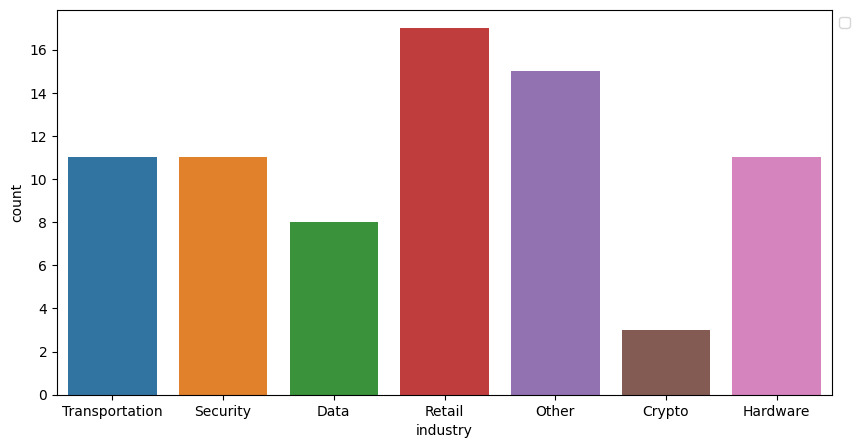

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=merged_dataset, x='industry', hue="industry", dodge = False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Section 2 - Layoff vs Stock Price Changes

### 2.1 Percentage Laid Off vs Percentage of Change in Stock Prices

In [31]:
df = merged_dataset.drop(columns=["company", "location", "stage", "country","funds_raised", "Open", "High", "Low", "Close", "Adj Close", "Volume"])
df = df.groupby(['month', 'industry']).mean().sort_values(by='month')
df['%change'] = df['avg'].pct_change()
df.fillna(0)
df = df.reset_index()
df['month'] = df['month'].astype('str')

def extract_year(string):
    date = datetime.strptime(string, "%Y-%m")
    year = date.year
    return year
df['years'] = df['month'].apply(extract_year)
years_df = df.drop(columns=['month', 'industry'])

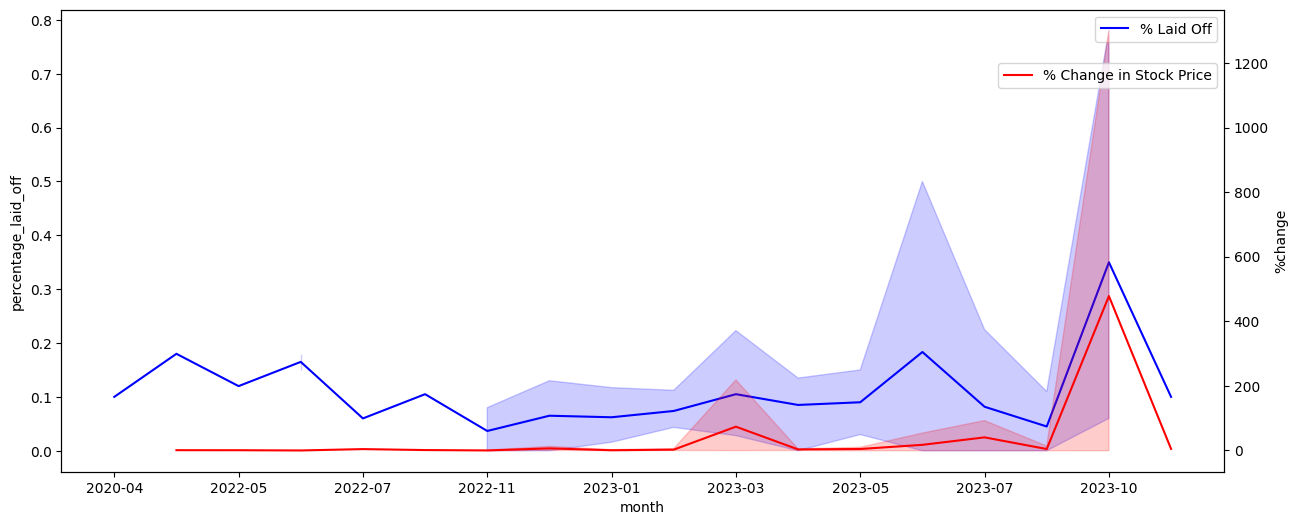

In [32]:
plt.figure(figsize=(15, 6))  # Increase figure size

sns.lineplot(data=df, x='month', y='percentage_laid_off', color='blue', label='% Laid Off')
ax2 = plt.twinx()
sns.lineplot(data=df, x='month', y='%change', ax=ax2, color="red", label='% Change in Stock Price')

plt.xticks(rotation=45)

# Reduce the number of x-axis labels for clarity
x_labels = df['month'].unique()
plt.xticks(ticks=range(0, len(x_labels), 2), labels=x_labels[::2])  # Adjust step as needed

plt.legend(loc='upper left', bbox_to_anchor=(0.8, 0.9))
plt.show()

This dual-axis line chart shows two plots, both using the `year-month` as the x-axis. The blue line corresponds to the `percentage of layoffs` that is measured by the left y-axis, while the red line represents the `percentage of change in average stock prices`, which is measured by the right y-axis. The data emphasizes a slight delay in layoffs following a dip in stock prices. We correlate this delay to be the result of the planning period companies may need before conducting and publicizing layoffs.


### 2.2 Total Layoff vs Percentage of Change in Stock Prices

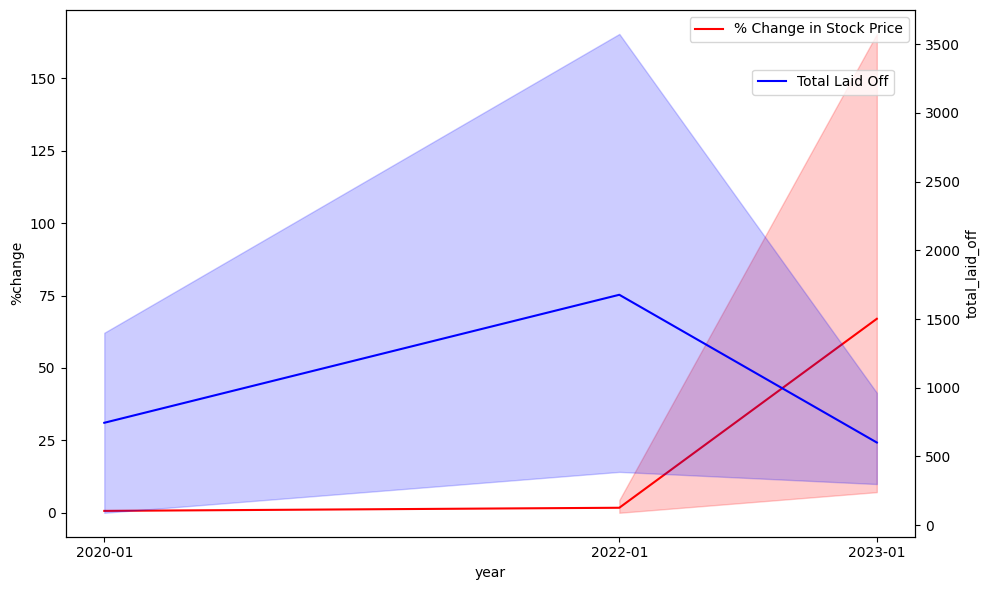

In [33]:
# Function to extract the year from the 'month' column
def extract_year(string):
    return datetime.strptime(string, "%Y-%m").year

# Create a 'year' column
df['year'] = df['month'].apply(extract_year)

# Aggregate the data by 'year'
annual_data = df.groupby('year').agg({'%change': 'mean', 'total_laid_off': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))

# Plot the '% change' data
sns.lineplot(data=df, x='year', y='%change', color='red', label='% Change in Stock Price')
ax2 = plt.twinx()
# Plot the 'total laid off' data
sns.lineplot(data=df, x='year', y='total_laid_off', ax=ax2, color='blue', label='Total Laid Off')

# Get the unique years and their corresponding month labels
unique_years = annual_data['year'].unique()
year_month_labels = [f"{year}-01" for year in unique_years]

# Set ticks and labels
plt.xticks(ticks=unique_years, labels=year_month_labels, rotation=45)

plt.legend(loc='upper left', bbox_to_anchor=(0.8, 0.9))
plt.tight_layout()
plt.show()


This dual-axis line chart provides a comprehensive temporal analysis spanning from 2020 to 2023, with the x-axis representing the months. The blue line corresponds to the y-axis on the right, depicting the `total number of layoffs`, while the red line, on the y-axis on the left, signifies the `percentage change in average stock prices`. Before 2022, there is a noticeable pattern where the percentage change in stock prices decreases simultaneously with a drop in total layoffs and increases when layoffs escalate. However, post-2022, a discernible inverse trend emerges, suggesting a shift in the relationship between stock performance and layoffs during this period.

### 2.3 Percentage Laid Off vs Average Stock Price Change

(-1.0, 1.0)

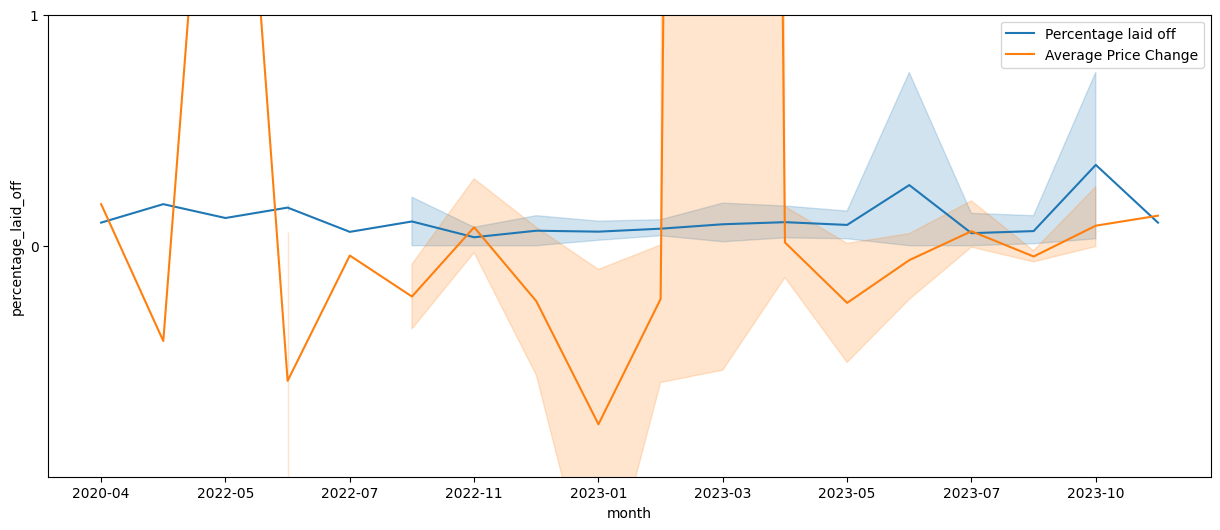

In [34]:
# Calculate average stock price change
merged_dataset['Average Price Change'] = (merged_dataset['Open'] - merged_dataset['Close'])

# Sort the DataFrame by 'month'
merged_dataset_sort = merged_dataset.sort_values(by='month').reset_index()

#layoffs vs average change in stock prices
merged_dataset_sort['month'] = merged_dataset_sort['month'].astype(str)

plt.figure(figsize=(15, 6))
sns.lineplot(x='month', y='percentage_laid_off', data=merged_dataset_sort, label='Percentage laid off')

sns.lineplot(x='month', y='Average Price Change', data=merged_dataset_sort, label='Average Price Change')
plt.xticks(ticks=range(0, len(x_labels), 2), labels=x_labels[::2])  # Adjust step as needed
plt.yticks(range(0, 10, 1))
plt.ylim(-1, 1)

The graph visually depicts the correlation between `layoffs` and `average stock price changes` in essential technology sectors from 2020 to 2023. 
The x-axis represents the months, while the left y-axis displays the `percentage of layoffs`, and the right y-axis exhibits the `average price change` in the stock. The line representing layoffs fluctuates over time, reflecting the dynamic trends in workforce changes, while the line representing average stock price changes provides insights into the financial performance of these companies. The correlation between the two lines offers a nuanced understanding of how layoffs might relate to shifts in stock prices within the designated technological industries. Peaks or troughs in either line may suggest potential connections between workforce dynamics and financial performance in the examined sectors.

## Analysis
### Correlation of Proportion of Layoffs and Average Stock Price Change

In [35]:
from scipy.stats import pearsonr

# Calculate average stock price per month
merged_dataset['Average Stock Price'] = (merged_dataset['High'] + merged_dataset['Low'])/2

percentage_laid_off = merged_dataset['percentage_laid_off']
average_price_change = merged_dataset['Average Stock Price']

correlation_coefficient, p_value = pearsonr(percentage_laid_off, average_price_change)

print(f'Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'P-Value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation Coefficient: -0.0717
P-Value: 0.5383
The correlation is not statistically significant.


Although the correlation coefficient suggest a slightly negative relationship between the stock prices and layoff, after conducting a Pearson Correlation, the p-value is significantly greater than $\alpha$ = 0.05. 

Therefore, there is no direct correlation between `layoffs` and `average stock price changes`. There are several factors that may account for this finding. One such possibility being that layoffs within a company can be influenced by a multitude of external factors including individual employee's performance, shifts in the company's focus on projects, and its overall financial performance. While `average price change in stocks` could be a significant variable, it is only one among many contributing factors. Another possible reason for there not being a direct correlation is that companies may focus on a broader, long-term decline in stock values before conducting layoffs rather than the immediate fluctuations that we were searching for. Because of this, there may be delays between stock prices dropping and layoffs, making it difficult to establish a clear and immediate correlation.

# Ethics & Privacy

When we proposed the research question between stock price performance and hiring/layoff decisions in the United States raises various ethical considerations related to biases, privacy and data usage. A potential concern is respecting the privacy of specific individuals within these companies. In the case that we come across data or want to pull from datasets that include specific employee information such as their names, positions, or reason for layoffs we will ensure that there is full anonymity in the data to not reveal sensitive information. 

Additionally, when analyzing data sets regarding layoffs in tech companies, certain biases could come into place that emphasize various demographic factors such as location, ethnicity, and race. Moreover, biases in data such as stereotype perpetuation, confirmation bias, and imbalanced classes mentioned in Deon’s Ethics Checklist could manifest limitations when conducting our analysis. To remedy this we carefully reviewed the datasets for all of said biases/limitations and be transparent in reporting them. It is important that we conduct analysis of these biases and limitations before conducting an analysis so we can adjust and find solutions accordingly. We made sure to  maintain a standard to solve these ethical and privacy issues throughout the entire project. 


The additional data that we have compiled raises only a few ethical concerns. As mentioned in our project proposal, a specific concern we had in analyzing and presenting the data was keeping specific employee information anonymous. In dataset #2, the layoffs dataset, we are provided with Excel sheets containing the list of employees who were laid off within different companies. These sheets also contain employee names, preferred work locations, areas of expertise, and links to their LinkedIn profile. Hence, moving forward we will anonymize all the names of those listed in the sheets and utilize only relevant information within the dataset to conduct our analysis. Dataset #1 remain within the ethical and privacy guidelines we have established as it does not expose any personal information nor does it draw any biases in data such as stereotype perpetuation, confirmation bias, and imbalanced classes. However, we will still continue to analyze this dataset. 

# Discussion and Conclusion

## Limitations

During the data collection phase, we encountered a challenge related to time constraints, as the project required sifting through an extensive list of tech companies spanning various industries. Due to these time limitations, we made the decision to narrow our focus to post IPO technology companies operating in specific sectors such as Data, Retail, Security, Hardware, Transportation, AI, and Crypto. This targeted approach allowed us to streamline our efforts and allocate resources more efficiently. However, it's important to note that the data we gathered for filtering purposes was somewhat constrained, as we prioritized more recent and relevant information over potentially valuable but dated data. This decision aimed to ensure the timeliness and accuracy of our research findings while acknowledging that older data could have offered additional insights into our research question.


## Conclusion and Further Steps

Stock prices are intricately linked to a number of factors, especially within sub-areas of the technology sector, which encompass Data, Retail, Security, Hardware, Transportation, AI, and Crypto. Understanding the dynamics within each of these specialized domains is crucial for comprehending the broader trends in the technology market. Valuable insights into the current employment strategies employed by major tech companies, such as Apple, Google, and Meta, can be gleaned from their annual reports. These reports not only shed light on the companies' financial health but also provide key information on their workforce dynamics and strategic directions. Previous research in this domain has laid a foundation for understanding the multifaceted nature of the relationship between stock prices and various internal and external factors that could contribute to change. 

In conclusion, our study has led to the intriguing finding that there is no direct correlation between average stock market price changes and layoffs in the technology sector. This outcome suggests that the relationship between a company's financial performance and its employment strategies are more complex than initially hypothesized. Several confounding factors could explain this lack of correlation. These include variations in employee performance, shifts in companies' project interests, the overall performance of the companies, and the perspectives of their Boards of Directors regarding the companies' long-term goals. Moreover, the decision-making process regarding layoffs is not instantaneous. Companies often take considerable time to evaluate their financial situation, market conditions, and strategic objectives before making decisions about reducing their workforce. This time lag can obscure any direct correlation between stock price changes and layoffs. This study underscores the need for a nuanced understanding of corporate decision-making, particularly in the volatile and fast-paced tech industry, where multiple internal and external factors interplay to shape company strategies.

Moving forward, we can extend our research in several key ways. Firstly, by expanding the timeframe and scope of data collection, we can include a broader range of technology companies at different stages of development, not just post-IPO firms. This approach will provide a more comprehensive analysis of the industry as a whole. Additionally, incorporating historical data alongside recent data will offer valuable insights into long-term trends and patterns in layoffs and stock price performance, giving context to our current findings and revealing how company strategies and market responses have evolved over time. Furthermore, to deepen our understanding of the factors influencing layoffs and stock price changes, we should consider including more variables in our analysis. These variables could include economic indicators like GDP growth and inflation rates, tech sector indices, and market sentiment data. Such an expanded dataset will allow for a more holistic view of the external factors impacting tech companies' financial decisions and workforce management strategies, thereby enriching the depth and relevance of our research.